# Model build

In [1]:
import os
import math
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pickle

# Data 가져오기

In [3]:
def load_images_from_folder(folder,only_path = False, label = ""):
    if only_path == False:
        images = []
        file_name=[]
        for filename in os.listdir(folder):
            img = plt.imread(os.path.join(folder,filename))
            
            if img is not None:
                end=filename.find(".")
                file_name.append(file[0:end])
                images.append(img)
                
        return images, file_name
    else:
        path = []
        for filename in os.listdir(folder):
            img_path = os.path.join(folder,filename)
            if img_path is not None:
                path.append([label,img_path])
        return path

In [4]:
images = [] 
path = "./database/"
for f in os.listdir(path):
    if "jpg" in os.listdir(path+f)[0]:
        images += load_images_from_folder(path+f,True,label = f)
      
    else: 
        for d in os.listdir(path+f):
            images += load_images_from_folder(path+f+"/"+d,True,label = f)
                       
# Create a dataframe with the paths and the label for each insect
df1 = pd.DataFrame(images, columns = ["insect_gbif", "path_img"])

file_name=[]
for i in range(len(df1["path_img"])):
    temp=df1.path_img[i].split('/')[-1].split('.')[0]
    file_name.append(temp)
file_name

df1['file_name'] = file_name
display(df1.describe())

display(df1)

,insect_gbif,path_img,file_name
count,63364,63364,63364
unique,291,63364,63364
top,9364935,./database/4472897/d160s0138.jpg,d176s0165
freq,888,1,1


,insect_gbif,path_img,file_name
0,7416497,./database/7416497/d113s0072.jpg,d113s0072
1,7416497,./database/7416497/d113s0045.jpg,d113s0045
2,7416497,./database/7416497/d113s0026.jpg,d113s0026
3,7416497,./database/7416497/d113s0006.jpg,d113s0006
4,7416497,./database/7416497/d113s0131.jpg,d113s0131
5,7416497,./database/7416497/d113s0011.jpg,d113s0011
6,7416497,./database/7416497/d113s0054.jpg,d113s0054
7,7416497,./database/7416497/d113s0079.jpg,d113s0079
8,7416497,./database/7416497/d113s0023.jpg,d113s0023
9,7416497,./database/7416497/d113s0122.jpg,d113s0122


In [7]:
labels = df1["insect_gbif"].unique()

labels_dict = dict(zip(range(len(labels)),labels))

{0: '7416497',
 1: '6097883',
 2: '1037293',
 3: '8051076',
 4: '5756015',
 5: '5754974',
 6: '6097854',
 7: '5755203',
 8: '1035931',
 9: '6097885',
 10: '8137203',
 11: '7641814',
 12: '5753720',
 13: '9314786',
 14: '1036255',
 15: '6097906',
 16: '4472929',
 17: '5757211',
 18: '4475685',
 19: '4474861',
 20: '5872829',
 21: '4475157',
 22: '4472858',
 23: '1035551',
 24: '4478679',
 25: '5755175',
 26: '5755954',
 27: '4480302',
 28: '4478699',
 29: '5716409',
 30: '9415910',
 31: '4470539',
 32: '1035290',
 33: '4475761',
 34: '1036128',
 35: '5755950',
 36: '6097861',
 37: '4480200',
 38: '8236590',
 39: '8300237',
 40: '4472897',
 41: '1036917',
 42: '9414758',
 43: '5755060',
 44: '5872127',
 45: '5757304',
 46: '5756814',
 47: '5755066',
 48: '6097896',
 49: '4480480',
 50: '7727698',
 51: '1037633',
 52: '1035194',
 53: '7419401',
 54: '5873215',
 55: '6097868',
 56: '5755051',
 57: '4988363',
 58: '7683246',
 59: '1035167',
 60: '7975487',
 61: '5756021',
 62: '4474780',
 6

In [8]:
num_images = len(df1["insect_gbif"])
print('Number of images are:', num_images)
no_labels=len(labels)
print('Number of insect species are:', no_labels)

('Number of images are:', 63364)
('Number of insect species are:', 291)


In [9]:
df1["insect_gbif"].value_counts()

9364935    888
1035931    861
7508714    818
4475140    719
1036216    686
5755079    651
4474169    642
1035185    599
1035195    570
1035864    566
4475677    553
1036154    535
5754974    520
7641814    519
7873810    517
1035551    516
4988354    512
7708350    500
7639821    494
1035578    475
1036893    472
1035290    471
5872124    458
6097883    450
1036192    449
4988484    444
6097882    426
7975487    426
4988447    423
5873271    422
          ... 
1037293     66
6097885     66
4480502     65
4478842     65
4473277     63
4475188     62
7792354     62
5755562     61
5716408     60
9414758     60
7387665     60
5755954     59
4478679     58
4475127     58
8417764     58
8307815     58
5757192     58
4475157     57
5755066     57
7683246     56
7419401     54
6097861     54
7613168     54
1035366     54
4472900     54
4478057     53
4480271     52
5757120     52
4471238     52
4474780     50
Name: insect_gbif, Length: 291, dtype: int64

In [10]:
train, validate, test = np.split(df1.sample(frac=1), [int(.6*len(df1)), int(.8*len(df1))])

display(train.describe())
display(validate.describe())
display(test.describe())

,insect_gbif,path_img,file_name
count,38018,38018,38018
unique,291,38018,38018
top,9364935,./database/7873810/d123s0177.jpg,d176s0165
freq,522,1,1


,insect_gbif,path_img,file_name
count,12673,12673,12673
unique,291,12673,12673
top,9364935,./database/5023047/d045s0043.jpg,d108s0108
freq,181,1,1


,insect_gbif,path_img,file_name
count,12673,12673,12673
unique,291,12673,12673
top,9364935,./database/9533851/d086s0531.jpg,d123s0264
freq,185,1,1


In [11]:
df=train.append(test, ignore_index=True)
df.describe()

,insect_gbif,path_img,file_name
count,50691,50691,50691
unique,291,50691,50691
top,9364935,./database/5755079/d146s0012.jpg,d176s0165
freq,707,1,1


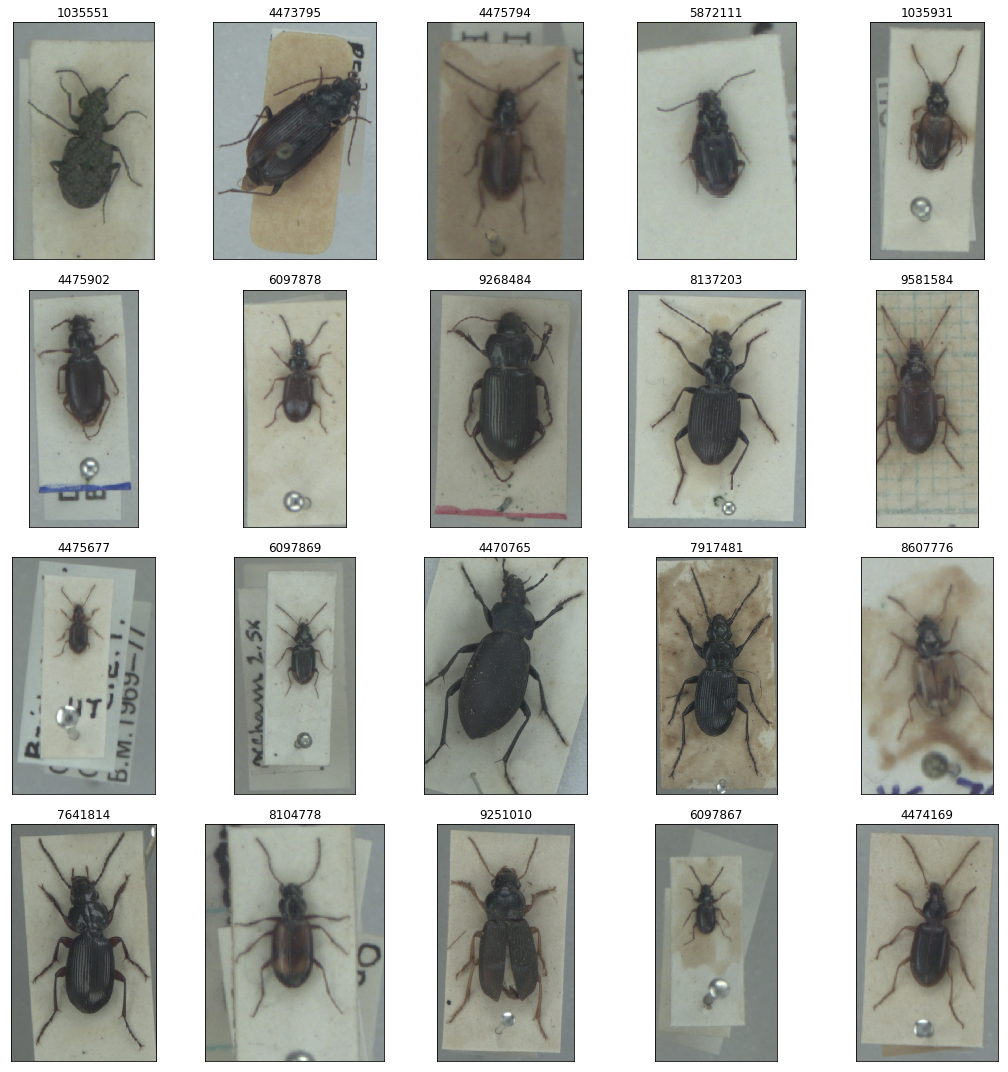

In [12]:
from sklearn.utils import shuffle
df = shuffle(df, random_state = 0)
df = df.reset_index(drop=True)

# Display 20 picture of the dataset with their labels
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(15, 15),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df.path_img[i]))
    ax.set_title(df.insect_gbif[i])
plt.tight_layout()
plt.show()

In [16]:
def load_image(image_path):
    # 이미지 경로를 텐서로 처리
    img_data = tf.io.read_file(image_path)
    # TensorFlow에서 이미지를 읽고 디코딩
    img = tf.image.decode_jpeg(img_data, channels=3)  # 이미지 포맷에 맞춰서 decode_jpeg나 decode_png 사용
    return img


def preprocess_image(img, is_training):
    # RGB 이미지를 흑백(Grayscale)으로 변환
    img = tf.image.rgb_to_grayscale(img)
    
    # 이미지 크기를 28x28로 조정
    img = tf.image.resize(img, [28, 28])
    
    # 정규화 (0 ~ 255 사이의 값을 0 ~ 1로 변경)
    img = img / 255.0
    
    return img

def load_dataset(df, is_training):
    # tf.data.Dataset 생성
    dataset = tf.data.Dataset.from_tensor_slices((df['path_img'], df['insect_gbif']))

    # Apply image loading and preprocessing
    dataset = dataset.map(lambda path, label: (preprocess_image(load_image(path), is_training), label))

    return dataset

# 사용 예시
train_dataset = load_dataset(train, is_training=True)  # 'train'은 DataFrame이어야 함
val_dataset = load_dataset(validate, is_training=False)
test_dataset = load_dataset(test, is_training=False)

In [17]:
def show_sample(img, target, invert=True):
    # 이미지 텐서가 [height, width, channels] 형식인지 확인 및 변환
    if len(img.shape) == 3 and img.shape[0] in [1, 3]:  # [channels, height, width]일 경우
        img = tf.transpose(img, perm=[1, 2, 0])  # [height, width, channels]로 변환
    
    # 이미지가 [0, 255]가 아닌 [0, 1] 범위에 있을 경우
    if tf.reduce_max(img) <= 1.0:  # tf.reduce_max로 최대값 확인
        img = img * 255.0  # [0, 255] 범위로 변환
    
    img = img.numpy().astype('uint8')  # NumPy 배열로 변환
    
    # 이미지 시각화
    if invert:
        plt.imshow(255 - img)  # 색상 반전
    else:
        plt.imshow(img)  # 원래 이미지
    
    plt.title('Labels: '+target)
    plt.axis('off')
    plt.show()

In [ ]:
import tensorflow as tf

# Training parameters
num_epochs = 10
batch_size = 64

# Create an iterator from your train_dataset, val_dataset
train_iterator = train_dataset.batch(batch_size).make_one_shot_iterator()
val_iterator = val_dataset.batch(batch_size).make_one_shot_iterator()

with tf.Session() as sess:
    sess.run(init)
    
    # Training loop
    for epoch in range(num_epochs):
        try:
            while True:  # Train until dataset is exhausted
                batch_x, batch_y = sess.run(train_iterator.get_next())
                # 원-핫 인코딩을 적용하여 레이블 크기 맞추기
                batch_y = tf.keras.utils.to_categorical(batch_y, num_classes=291)

                # Run optimization and calculate loss
                _, train_loss = sess.run([optimizer, loss], feed_dict={x: batch_x, y: batch_y})
        except tf.errors.OutOfRangeError:
            pass  # Dataset finished

        # Validation step after each epoch
        try:
            val_acc = []
            while True:
                val_x, val_y = sess.run(val_iterator.get_next())
                val_accuracy = sess.run(accuracy, feed_dict={x: val_x, y: val_y})
                val_acc.append(val_accuracy)
        except tf.errors.OutOfRangeError:
            pass
        
        # Calculate average validation accuracy
        print("Epoch " + str(epoch + 1) + ", Loss: " + str(train_loss) + ", Validation Accuracy: " + str(sum(val_acc) / len(val_acc)))
    
    # Testing (assuming test_dataset exists)
    test_iterator = test_dataset.batch(batch_size).make_one_shot_iterator()
    test_acc = []
    
    try:
        while True:
            test_x, test_y = sess.run(test_iterator.get_next())
            test_accuracy = sess.run(accuracy, feed_dict={x: test_x, y: test_y})
            test_acc.append(test_accuracy)
    except tf.errors.OutOfRangeError:
        pass
    
    print("Test Accuracy: " + str(sum(test_acc) / len(test_acc)))


IndexError: index 7840196 is out of bounds for axis 1 with size 291

In [4]:
# MNIST 데이터 로드
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# Initialize variables
init = tf.global_variables_initializer()

# Training parameters
num_epochs = 5
batch_size = 50

# Session
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(num_epochs):
        total_batch = int(mnist.train.num_examples / batch_size)
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            # Reshape the input to [batch_size, 28, 28, 1]
            batch_x = batch_x.reshape(-1, 28, 28, 1)
            
            # Train the model
            sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})
        
        # Calculate accuracy on validation data
        val_accuracy = sess.run(accuracy, feed_dict={x: mnist.validation.images.reshape(-1, 28, 28, 1), y: mnist.validation.labels})
        print("Epoch:", epoch + 1, "Validation Accuracy:", val_accuracy)
    
    # Test the model
    test_accuracy = sess.run(accuracy, feed_dict={x: mnist.test.images.reshape(-1, 28, 28, 1), y: mnist.test.labels})
    print("Test Accuracy:", test_accuracy)
    
    # Save the weights and biases for each layer
    conv1_vars = [tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope="conv2d/kernel")[0], 
                  tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope="conv2d/bias")[0]]
    save_layer_params('conv1', sess, conv1_vars)
    
    conv2_vars = [tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope="conv2d_1/kernel")[0], 
                  tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope="conv2d_1/bias")[0]]
    save_layer_params('conv2', sess, conv2_vars)
    
    fc1_vars = [tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope="dense/kernel")[0], 
                tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope="dense/bias")[0]]
    save_layer_params('fc1', sess, fc1_vars)
    
    fc2_vars = [tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope="dense_1/kernel")[0], 
                tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope="dense_1/bias")[0]]
    save_layer_params('fc2', sess, fc2_vars)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
('Epoch:', 1, 'Validation Accuracy:', 0.9706)
('Epoch:', 2, 'Validation Accuracy:', 0.979)
('Epoch:', 3, 'Validation Accuracy:', 0.9822)
('Epoch:', 4, 'Validation Accuracy:', 0.9818)
('Epoch:', 5, 'Validation Accuracy:', 0.9846)
('Test Accuracy:', 0.9866)


In [12]:
# 가중치와 편향 불러오기 예시
with open('./params/fc1_w.param', 'rb') as f_w:
    conv1_weights = pickle.load(f_w)
    print(conv1_weights.shape)
    print(conv1_weights[:,0])

(256, 32)
[ 1.98022928e-02  1.05006315e-01  6.66397139e-02  6.95463344e-02
 -1.41802981e-01 -1.00931473e-01  1.13409549e-01 -1.13864906e-01
 -1.45566627e-01  6.07127585e-02  1.10139556e-01 -1.19081035e-01
 -1.23970747e-01  1.47789309e-04 -1.66510016e-01  3.16918418e-02
  1.06096916e-01 -6.50621578e-02 -1.52853847e-01 -1.12608634e-01
 -1.47416204e-01  4.87657823e-03 -1.02181248e-01 -7.24807456e-02
  3.65112983e-02 -1.69546589e-01 -8.73865262e-02  1.68053918e-02
 -7.17641460e-03 -1.37847573e-01 -1.00857370e-01 -4.80934046e-02
  1.01149142e-01 -1.32373929e-01 -1.25195205e-01  1.02606574e-02
  8.91218036e-02 -3.77130993e-02 -4.84364517e-02  3.55564728e-02
 -3.97368744e-02 -1.22640319e-01 -1.06144100e-01 -1.99921206e-01
 -8.13171491e-02  1.28950641e-01 -5.23145571e-02  9.63173062e-02
 -3.71980295e-02 -5.87433092e-02  8.71078949e-03  1.16655901e-01
  5.26739433e-02 -8.89605097e-03 -1.67028710e-01 -4.94202115e-02
 -1.40137151e-01  4.02839854e-02 -1.04374878e-01 -2.05035299e-01
  6.24174736e-0

In [13]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# PRINT SAMPLE 
print(mnist.train.images[0])


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.   